In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import scipy.stats as ss, scipy.integrate as integrate
import src.preprocess as preprocess

In [47]:
df = pd.read_csv('data/policecalls2021.csv')
df

,CDTS,EID,START_DATE,CALL_NUMBER,PRIORITY,REPORT_DATE,OFFENSE_DATE,OFFENSE_TIME,CALLTYPE_CODE,CALL_TYPE,FINAL_DISPO_CODE,FINAL_DISPO,COMMON_PLACE_NAME,ADDRESS,CITY,STATE
0,20210101000447PS,8444832,5/15/2021 12:00:00 AM,P210010001,4,1/1/2021 12:00:00 AM,1/1/2021 12:00:00 AM,00:00:08,415FC,"DISTURBANCE, FIRECRACKERS",CAN,Canceled,NaN,[0]-[100] ARCHER ST,San Jose,CA
1,20210101000117PS,8444833,5/15/2021 12:00:00 AM,P210010002,4,1/1/2021 12:00:00 AM,1/1/2021 12:00:00 AM,00:01:05,415FC,"DISTURBANCE, FIRECRACKERS",CAN,Canceled,NaN,[6200]-[6300] MOUNTFORD DR,San Jose,CA
2,20210101000340PS,8444839,5/15/2021 12:00:00 AM,P210010006,4,1/1/2021 12:00:00 AM,1/1/2021 12:00:00 AM,00:03:12,415FC,"DISTURBANCE, FIRECRACKERS",CAN,Canceled,87 AT BRANHAM,NaN,San Jose,CA
3,20210102001021PS,8444842,5/15/2021 12:00:00 AM,P210010008,3,1/1/2021 12:00:00 AM,1/1/2021 12:00:00 AM,00:03:47,602PC,TRESPASSING,CAN,Canceled,NaN,Not a valid geographical locat,San Jose,CA
4,20210101000547PS,8444844,5/15/2021 12:00:00 AM,P210010010,4,1/1/2021 12:00:00 AM,1/1/2021 12:00:00 AM,00:05:02,415FC,"DISTURBANCE, FIRECRACKERS",CAN,Canceled,NaN,BLOSSOM HILL RD & MONTEREY FRO,San Jose,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375892,20211227132835PS,8907430,1/1/2022 12:00:00 AM,P213610308,2,12/27/2021 12:00:00 AM,12/27/2021 12:00:00 AM,11:37:54,WELCK,WELFARE CHECK,N,No report required; dispatch record only,NaN,[1900]-[2000] ROSENELFE CL,San Jose,CA
1375893,20211227132931PS,8907572,1/1/2022 12:00:00 AM,P213610428,6,12/27/2021 12:00:00 AM,12/27/2021 12:00:00 AM,13:23:09,1195,VEHICLE STOP,D,"Traffic Citation Issued, Hazardous Violation",NaN,CAMDEN AV & MT FOREST DR,San Jose,CA
1375894,20211227133017PS,8907496,1/1/2022 12:00:00 AM,P213610363,5,12/27/2021 12:00:00 AM,12/27/2021 12:00:00 AM,12:28:47,10851R,RECOVERED STOLEN VEHICLE,CAN,Canceled,NaN,BERNAL RD & SAN IGNACIO AV,San Jose,CA
1375895,20211227133033PS,8907578,1/1/2022 12:00:00 AM,P213610433,2,12/27/2021 12:00:00 AM,12/27/2021 12:00:00 AM,13:29:27,415,DISTURBANCE,CAN,Canceled,NaN,[300]-[400] S 1ST ST,San Jose,CA


In [48]:
df_params = preprocess.pp(df, 2021)

arrests = df_params.loc[df_params['RESULT'] == 1]
arrest_count = arrests.shape[0]
not_arrests = df_params.loc[df_params['RESULT'] == 0]
not_arrest_count = not_arrests.shape[0]
arrest_mean, arrest_mode, arrest_std = arrests['PRIORITY'].mean(), arrests['PRIORITY'].mode()[0], arrests['PRIORITY'].std()
not_arrest_mean, not_arrest_mode, not_arrest_std = not_arrests['PRIORITY'].mean(), not_arrests['PRIORITY'].mode()[0], not_arrests['PRIORITY'].std()
print(f'''
    (where arrests is 'A' or 'B' or 'C')
    arrests:                        {arrest_count},
    not arrests:                 {not_arrest_count},
    max priority:                {df_params['PRIORITY'].max()}
    arrests priority mean: {arrest_mean}
    arrests priority mode: {arrest_mode}
    arrests priority std:      {arrest_std}
    not-arrests priority mean: {not_arrest_mean}
    not-arrests priority mode: {not_arrest_mode}
    not-arrests priority std:      {not_arrest_std}
''')
arrests

/var/folders/5n/hy1r5gz51gjcr_ppq8r11n580000gn/T/ipykernel_17748/3959623429.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_params['OFFENSE_DAY'] = (pd.to_datetime(df['OFFENSE_DATE']) + pd.to_timedelta(df['OFFENSE_TIME']) -



    (where arrests is 'A' or 'B' or 'C')
    arrests:                        39890,
    not arrests:                 1336007,
    max priority:                6
    arrests priority mean: 3.4096515417397844
    arrests priority mode: 2
    arrests priority std:      1.6738419733361114
    not-arrests priority mean: 3.312817971762124
    not-arrests priority mode: 2
    not-arrests priority std:      1.4278018184572396



/var/folders/5n/hy1r5gz51gjcr_ppq8r11n580000gn/T/ipykernel_17748/3959623429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_params['RESULT'] = df['FINAL_DISPO_CODE'].apply(


,PRIORITY,CALLTYPE_CODE,OFFENSE_DAY,RESULT
109,3,DVRO,0.068530,1
273,2,415,0.369641,1
304,6,1195,0.426609,1
316,4,11300,0.462593,1
359,3,415,0.519398,1
...,...,...,...,...
1375677,6,12500,362.562940,1
1375719,2,23153,363.910521,1
1375755,2,12020,360.018426,1
1375757,2,23152,359.950498,1


In [49]:
not_arrests

,PRIORITY,CALLTYPE_CODE,OFFENSE_DAY,RESULT
0,4,415FC,0.000093,0
1,4,415FC,0.000752,0
2,4,415FC,0.002222,0
3,3,602PC,0.002627,0
4,4,415FC,0.003495,0
...,...,...,...,...
1375892,2,WELCK,360.484653,0
1375893,6,1195,360.557743,0
1375894,5,10851R,360.519988,0
1375895,2,415,360.562118,0


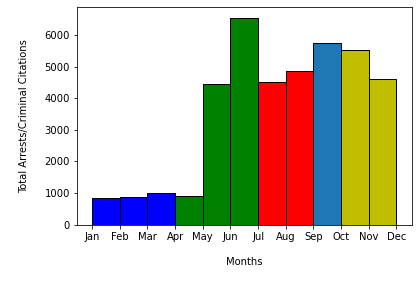

In [64]:
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(arrests['OFFENSE_DAY'], bins=11, edgecolor="black")
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i in range(0, 3):
    patches[i].set_facecolor('b')
for i in range(3, 6):
    patches[i].set_facecolor('g')
for i in range(6, 8):
    patches[i].set_facecolor('r')
for i in range(9, 11):
    patches[i].set_facecolor('y')
ax.set_xticks(bins)
ax.set_xticklabels(months)
plt.xlabel('\nMonths\n')
plt.ylabel('\nTotal Arrests/Criminal Citations\n')
plt.show()
